In [1]:
import numpy as np
import sys

import pycbc
import pycbc.waveform
sys.path.append('/home/anirudh.nemmani/git_repos/teobresums/Python/')
import EOBRun_module # TEOBResumS module

import time
from tabulate import tabulate
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# Generating parameters dictionary for TEOBResumS generation.

In [2]:
param_dict = dict(M=50, q=1.5, lambdaAl2 = 0.0, LambdaBl2 = 0.0, 
                  chi1 = 0.0, chi2 = 0.0, chi1z = 0.0, chi2z = 0.0, chi1x = 0.0, chi2x = 0.0, chi1y = 0.0, chi2y = 0.0,
                  distance=2000, inclination = np.pi/6, coalescence_angle=0,
                  domain=0, initial_frequency = 0.001, 
                  use_mode_lm =[1], use_geometric_units = 0, srate_interp = 16, # sampling rate is set lower to cut the waveform at lower frequency.
                  interp_uniform_grid = 1, output_lm=[1],
                  ecc=0, ecc_freq=2)

Printing the above parameter dictionary

In [3]:
table = [(k1, v1, k2, v2, k3, v3, k4, v4, k5, v5) for (k1, v1), (k2, v2), (k3, v3), (k4, v4), (k5, v5) in zip(list(param_dict.items())[::5], list(param_dict.items())[1::5], list(param_dict.items())[2::5], list(param_dict.items())[3::5], list(param_dict.items())[4::5])]
print(tabulate(table, headers=["Parameter", "Value"]*5, tablefmt="fancy_grid", numalign="center"))

╒═════════════╤═════════╤═══════════════════╤═════════╤═════════════╤═════════╤═════════════════════╤══════════╤═══════════════════╤═════════╕
│ Parameter   │  Value  │ Parameter         │  Value  │ Parameter   │ Value   │ Parameter           │  Value   │ Parameter         │  Value  │
╞═════════════╪═════════╪═══════════════════╪═════════╪═════════════╪═════════╪═════════════════════╪══════════╪═══════════════════╪═════════╡
│ M           │   50    │ q                 │   1.5   │ lambdaAl2   │ 0.0     │ LambdaBl2           │    0     │ chi1              │    0    │
├─────────────┼─────────┼───────────────────┼─────────┼─────────────┼─────────┼─────────────────────┼──────────┼───────────────────┼─────────┤
│ chi2        │    0    │ chi1z             │    0    │ chi2z       │ 0.0     │ chi1x               │    0     │ chi2x             │    0    │
├─────────────┼─────────┼───────────────────┼─────────┼─────────────┼─────────┼─────────────────────┼──────────┼───────────────────┼─────────┤

# Issues I am facing with TEOBResumS

## Issue 1 - Generating the waveform from $f_{start}$ = 0.001 Hz and eccentricity, $e$ = 0

The kernel crashes when we set lower $f_{start}$ and eccentricity, $e$ = 0

In [5]:
t, hp, hc = EOBRun_module.EOBRunPy(param_dict)

: 

## Issue 2 - Generating the waveform from $f_{start}$ = 0.001 Hz with an eccentricity, $e$ = 0.1

In [4]:
param_dict = dict(M=50, q=1.5, lambdaAl2 = 0.0, LambdaBl2 = 0.0, 
                  chi1 = 0.0, chi2 = 0.0, chi1z = 0.0, chi2z = 0.0, chi1x = 0.0, chi2x = 0.0, chi1y = 0.0, chi2y = 0.0,
                  distance=2000, inclination = np.pi/6, coalescence_angle=0,
                  domain=0, initial_frequency = 0.001, 
                  use_mode_lm =[1], use_geometric_units = 0, srate_interp = 16, # sampling rate is set lower to cut the waveform at lower frequency.
                  interp_uniform_grid = 1, output_lm=[1],
                  ecc=0.1, ecc_freq=2)

In [5]:
t, hp, hc = EOBRun_module.EOBRunPy(param_dict)

Plotting the time domain waveform

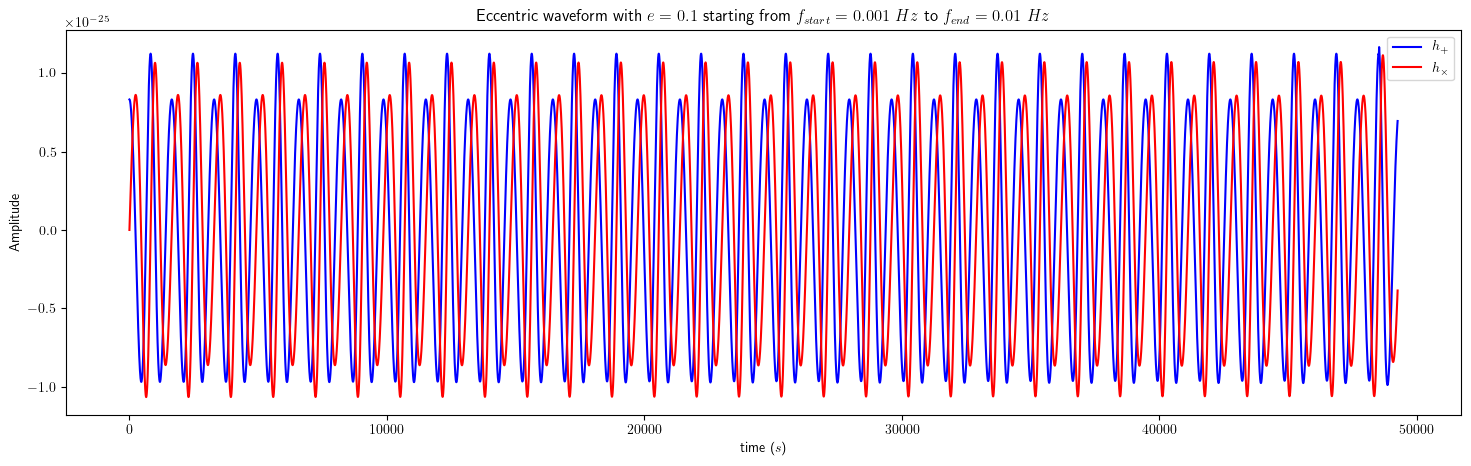

In [6]:
fig = plt.figure(figsize=(18, 5))
plt.plot(t, hp, color = 'blue', label=r'$h_{+}$')
plt.plot(t, hc, color = 'red', label=r'$h_{\times}$')
plt.xlabel(r'time ($s$)')
plt.ylabel(r'Amplitude')
plt.legend(loc='upper right')
plt.title(r'Eccentric waveform with $e = 0.1$ starting from $f_{start} = 0.001$ $Hz$ to $f_{end} = 0.01$ $Hz$')
plt.show()

Tapering the waveform using PyCBC to convert it into frequency series.

In [7]:
pycbc_hp = pycbc.types.TimeSeries(hp, delta_t=t[1]-t[0])
pycbc_hc = pycbc.types.TimeSeries(hc, delta_t=t[1]-t[0])

taper_hp = pycbc.waveform.utils.taper_timeseries(pycbc_hp, tapermethod='TAPER_STARTEND', return_lal=False)
taper_hc = pycbc.waveform.utils.taper_timeseries(pycbc_hc, tapermethod='TAPER_STARTEND', return_lal=False)

Converting into frequency series

In [8]:
fd_hp = taper_hp.to_frequencyseries(delta_f=taper_hp.delta_f)
fd_hc = taper_hc.to_frequencyseries(delta_f=taper_hc.delta_f)

Plotting the waveform

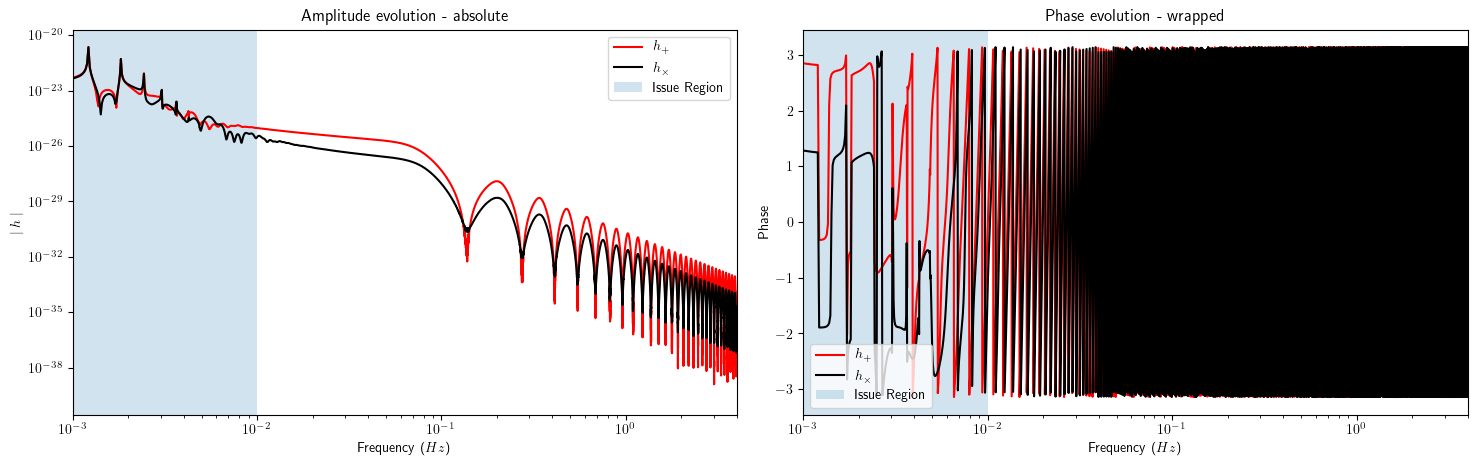

In [9]:
fig = plt.figure(figsize=(18, 5))
plt.subplots_adjust(wspace= 0.1, hspace= 0.1)

sub_figure_1 = fig.add_subplot(1,2,1)
sub_figure_1.plot(fd_hp.sample_frequencies, np.abs(fd_hp), label=r'$h_{+}$', color='r')
sub_figure_1.plot(fd_hc.sample_frequencies, np.abs(fd_hc), label=r'$h_{\times}$', color='k')
sub_figure_1.set_title(r'Amplitude evolution - absolute')
sub_figure_1.set_xlabel(r'Frequency ($Hz$)')
sub_figure_1.set_xscale('log')
sub_figure_1.set_xlim(0.001, 4)
sub_figure_1.set_ylabel(r'$\mid h \mid$')
sub_figure_1.set_yscale('log')
sub_figure_1.axvspan(0.001, 0.01, alpha=0.2, label=r'Issue Region')
sub_figure_1.legend()

sub_figure_2 = fig.add_subplot(1,2,2)
sub_figure_2.plot(fd_hp.sample_frequencies, np.angle(fd_hp), label=r'$h_{+}$', color='r')
sub_figure_2.plot(fd_hc.sample_frequencies, np.angle(fd_hc), label=r'$h_{\times}$', color='k')
sub_figure_2.set_title(r'Phase evolution - wrapped')
sub_figure_2.set_xlabel(r'Frequency ($Hz$)')
sub_figure_2.set_xscale('log')
sub_figure_2.set_xlim(0.001, 4)
sub_figure_2.set_ylabel(r'Phase')
sub_figure_2.axvspan(0.001, 0.01, alpha=0.2, label=r'Issue Region')
sub_figure_2.legend()
plt.show()

Zooming in the shaded region

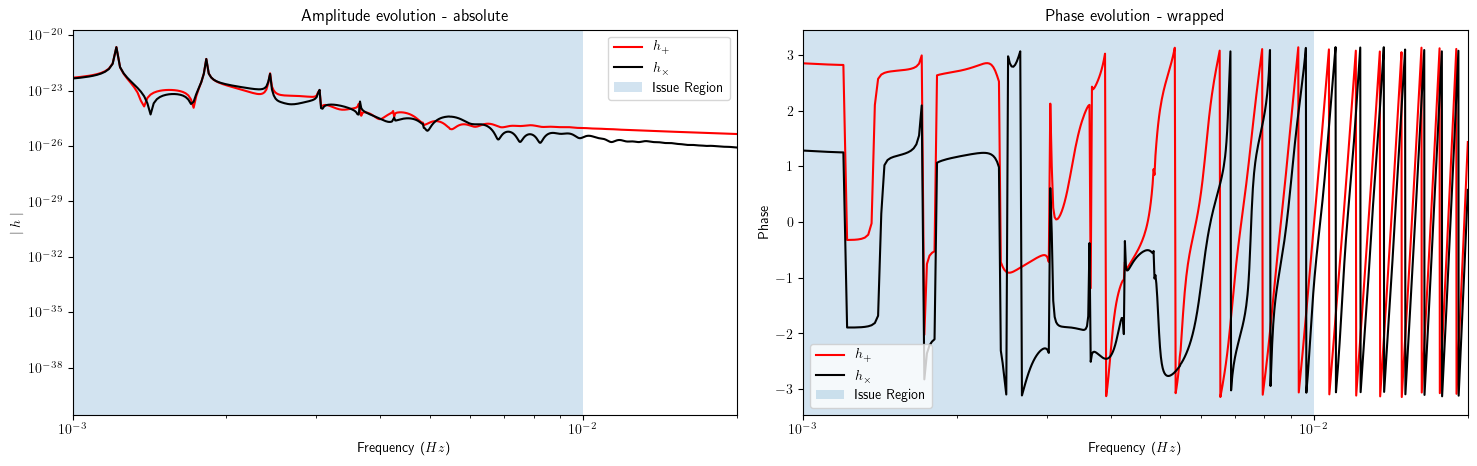

In [10]:
fig = plt.figure(figsize=(18, 5))
plt.subplots_adjust(wspace= 0.1, hspace= 0.1)

sub_figure_1 = fig.add_subplot(1,2,1)
sub_figure_1.plot(fd_hp.sample_frequencies, np.abs(fd_hp), label=r'$h_{+}$', color='r')
sub_figure_1.plot(fd_hc.sample_frequencies, np.abs(fd_hc), label=r'$h_{\times}$', color='k')
sub_figure_1.set_title(r'Amplitude evolution - absolute')
sub_figure_1.set_xlabel(r'Frequency ($Hz$)')
sub_figure_1.set_xscale('log')
sub_figure_1.set_xlim(0.001, 0.02)
sub_figure_1.set_ylabel(r'$\mid h \mid$')
sub_figure_1.set_yscale('log')
sub_figure_1.axvspan(0.001, 0.01, alpha=0.2, label=r'Issue Region')
sub_figure_1.legend()

sub_figure_2 = fig.add_subplot(1,2,2)
sub_figure_2.plot(fd_hp.sample_frequencies, np.angle(fd_hp), label=r'$h_{+}$', color='r')
sub_figure_2.plot(fd_hc.sample_frequencies, np.angle(fd_hc), label=r'$h_{\times}$', color='k')
sub_figure_2.set_title(r'Phase evolution - wrapped')
sub_figure_2.set_xlabel(r'Frequency ($Hz$)')
sub_figure_2.set_xscale('log')
sub_figure_2.set_xlim(0.001, 0.02)
sub_figure_2.set_ylabel(r'Phase')
sub_figure_2.axvspan(0.001, 0.01, alpha=0.2, label=r'Issue Region')
sub_figure_2.legend()
plt.show()

As you can see from the above figure, we can notice that the phase and $\mid h \mid$ evolutions are showing an unexpected trend. I wanted to understand if the trend is usually observed.

If it is not usual, then it would either be

- That I am assuming that this problem might be because of how we are generating the signal using the initial conditions.

    If this is the case, it would be helpful if you can provide with details on how the initial conditions should be given to the EOBRun_module to generate a proper waveform.

- Or it can be because of waveform accuracy at lower frequencies.

    In this case, I am guessing it would depend on more accurate developments in the future :)

<u>Note</u> - 

Also, I am plotting the scatter plot for the above plot to represent the data points in a more clear way.

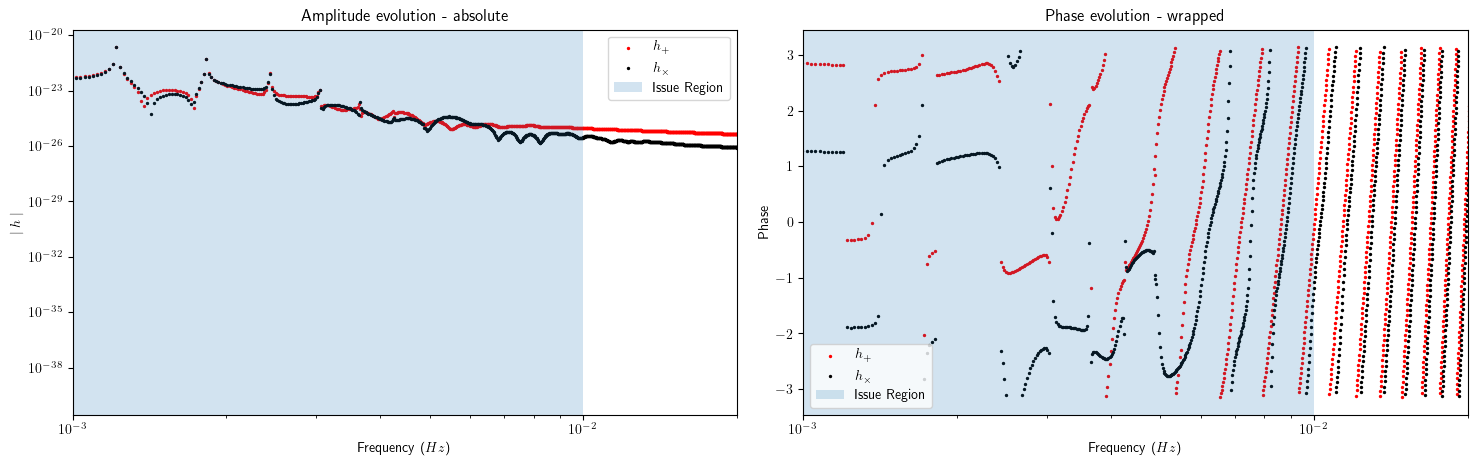

In [11]:
fig = plt.figure(figsize=(18, 5))
plt.subplots_adjust(wspace= 0.1, hspace= 0.1)

sub_figure_1 = fig.add_subplot(1,2,1)
sub_figure_1.scatter(fd_hp.sample_frequencies, np.abs(fd_hp), label=r'$h_{+}$', color='r', s=2)
sub_figure_1.scatter(fd_hc.sample_frequencies, np.abs(fd_hc), label=r'$h_{\times}$', color='k', s=2)
sub_figure_1.set_title(r'Amplitude evolution - absolute')
sub_figure_1.set_xlabel(r'Frequency ($Hz$)')
sub_figure_1.set_xscale('log')
sub_figure_1.set_xlim(0.001, 0.02)
sub_figure_1.set_ylabel(r'$\mid h \mid$')
sub_figure_1.set_yscale('log')
sub_figure_1.axvspan(0.001, 0.01, alpha=0.2, label=r'Issue Region')
sub_figure_1.legend()

sub_figure_2 = fig.add_subplot(1,2,2)
sub_figure_2.scatter(fd_hp.sample_frequencies, np.angle(fd_hp), label=r'$h_{+}$', color='r', s=2)
sub_figure_2.scatter(fd_hc.sample_frequencies, np.angle(fd_hc), label=r'$h_{\times}$', color='k', s=2)
sub_figure_2.set_title(r'Phase evolution - wrapped')
sub_figure_2.set_xlabel(r'Frequency ($Hz$)')
sub_figure_2.set_xscale('log')
sub_figure_2.set_xlim(0.001, 0.02)
sub_figure_2.set_ylabel(r'Phase')
sub_figure_2.axvspan(0.001, 0.01, alpha=0.2, label=r'Issue Region')
sub_figure_2.legend(loc='lower left')
plt.show()